# Plot time-mean SST pattern in the amip-future4K simulations

The sst is obtained from the supplement of Webb et al., 2017, GMD, The Cloud Feedback Model Intercomparison Project (CFMIP) contribution to CMIP6, https://gmd.copernicus.org/articles/10/359/2017/.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

Loads time-mean sst.

In [2]:
sst = xr.open_dataset("/users/staff/avoigt/cmip6-crh/cfmip2-sst/cfmip2_4k_patterned_sst_forcing.vn1.0.nc", 
                      decode_times=False).drop("level001").mean("time").squeeze()["dt"]

Makes plot.

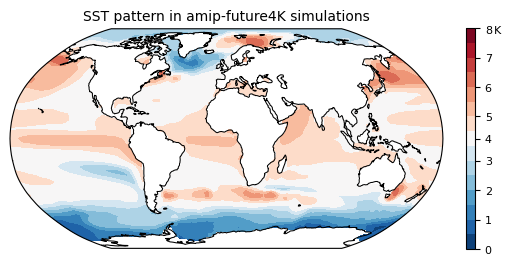

In [3]:
clev = np.delete(np.linspace(-4,4,17),8)

plt.figure(figsize=(6,4))
pdata, lons = add_cyclic_point(sst.values-4, coord=sst.longitude)
lats = sst.latitude
ax = plt.axes(projection=ccrs.Robinson())
cnt=plt.contourf(lons, lats, np.clip(pdata,a_max=4,a_min=-4), levels=clev,
             transform=ccrs.PlateCarree(), cmap="RdBu_r")
for c in cnt.collections: c.set_edgecolor("face")
ax.coastlines(resolution="110m", linewidth=0.75)
cb=plt.colorbar(aspect=25,fraction=0.019)
cb.set_ticks([-4,-3,-2,-1,0,1,2,3,4])
cb.set_ticklabels([0,1,2,3,4,5,6,7,r"8$\,$K"])
cb.ax.tick_params(labelsize=8)
plt.title("SST pattern in amip-future4K simulations", fontsize=10)

plt.savefig("figures/dsst_amipfuture4K.pdf")